### Apply ML algorithms

- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- Huperparameter Tuning
- ANN- Artificial Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,6.1,9.0,3.7,1006.0,81.0,21.9,18.1,27.8,284.795833
1,6.9,11.0,2.0,1022.8,90.0,16.6,14.6,27.8,219.720833
2,10.6,12.0,8.5,1032.7,90.0,15.0,18.7,25.9,182.187500
3,8.1,9.1,7.0,1026.8,90.0,12.4,14.4,18.3,154.037500
4,10.0,11.5,8.2,1024.0,86.0,15.4,15.2,25.9,223.208333


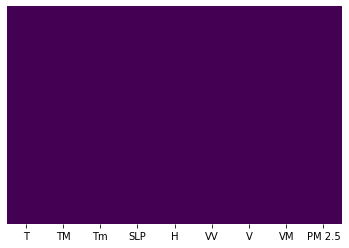

In [6]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [7]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [8]:
## check null values
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
103,False,False,False,False,False,False,False,False
104,False,False,False,False,False,False,False,False
105,False,False,False,False,False,False,False,False
106,False,False,False,False,False,False,False,False


In [51]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1063    False
1064    False
1065    False
1066    False
1067    False
1068    False
1069    False
1070    False
1071    False
1072    False
1073    False
1074    False
1075    False
1076    False
1077    False
1078    False
1079    False
1080    False
1081    False
1082    False
1083    False
1084    False
1085    False
1086    False
1087    False
1088    False
1089    False
1090    False
1091    False
1092    False
Name: PM 2.5, Length: 1092, dtype: bool

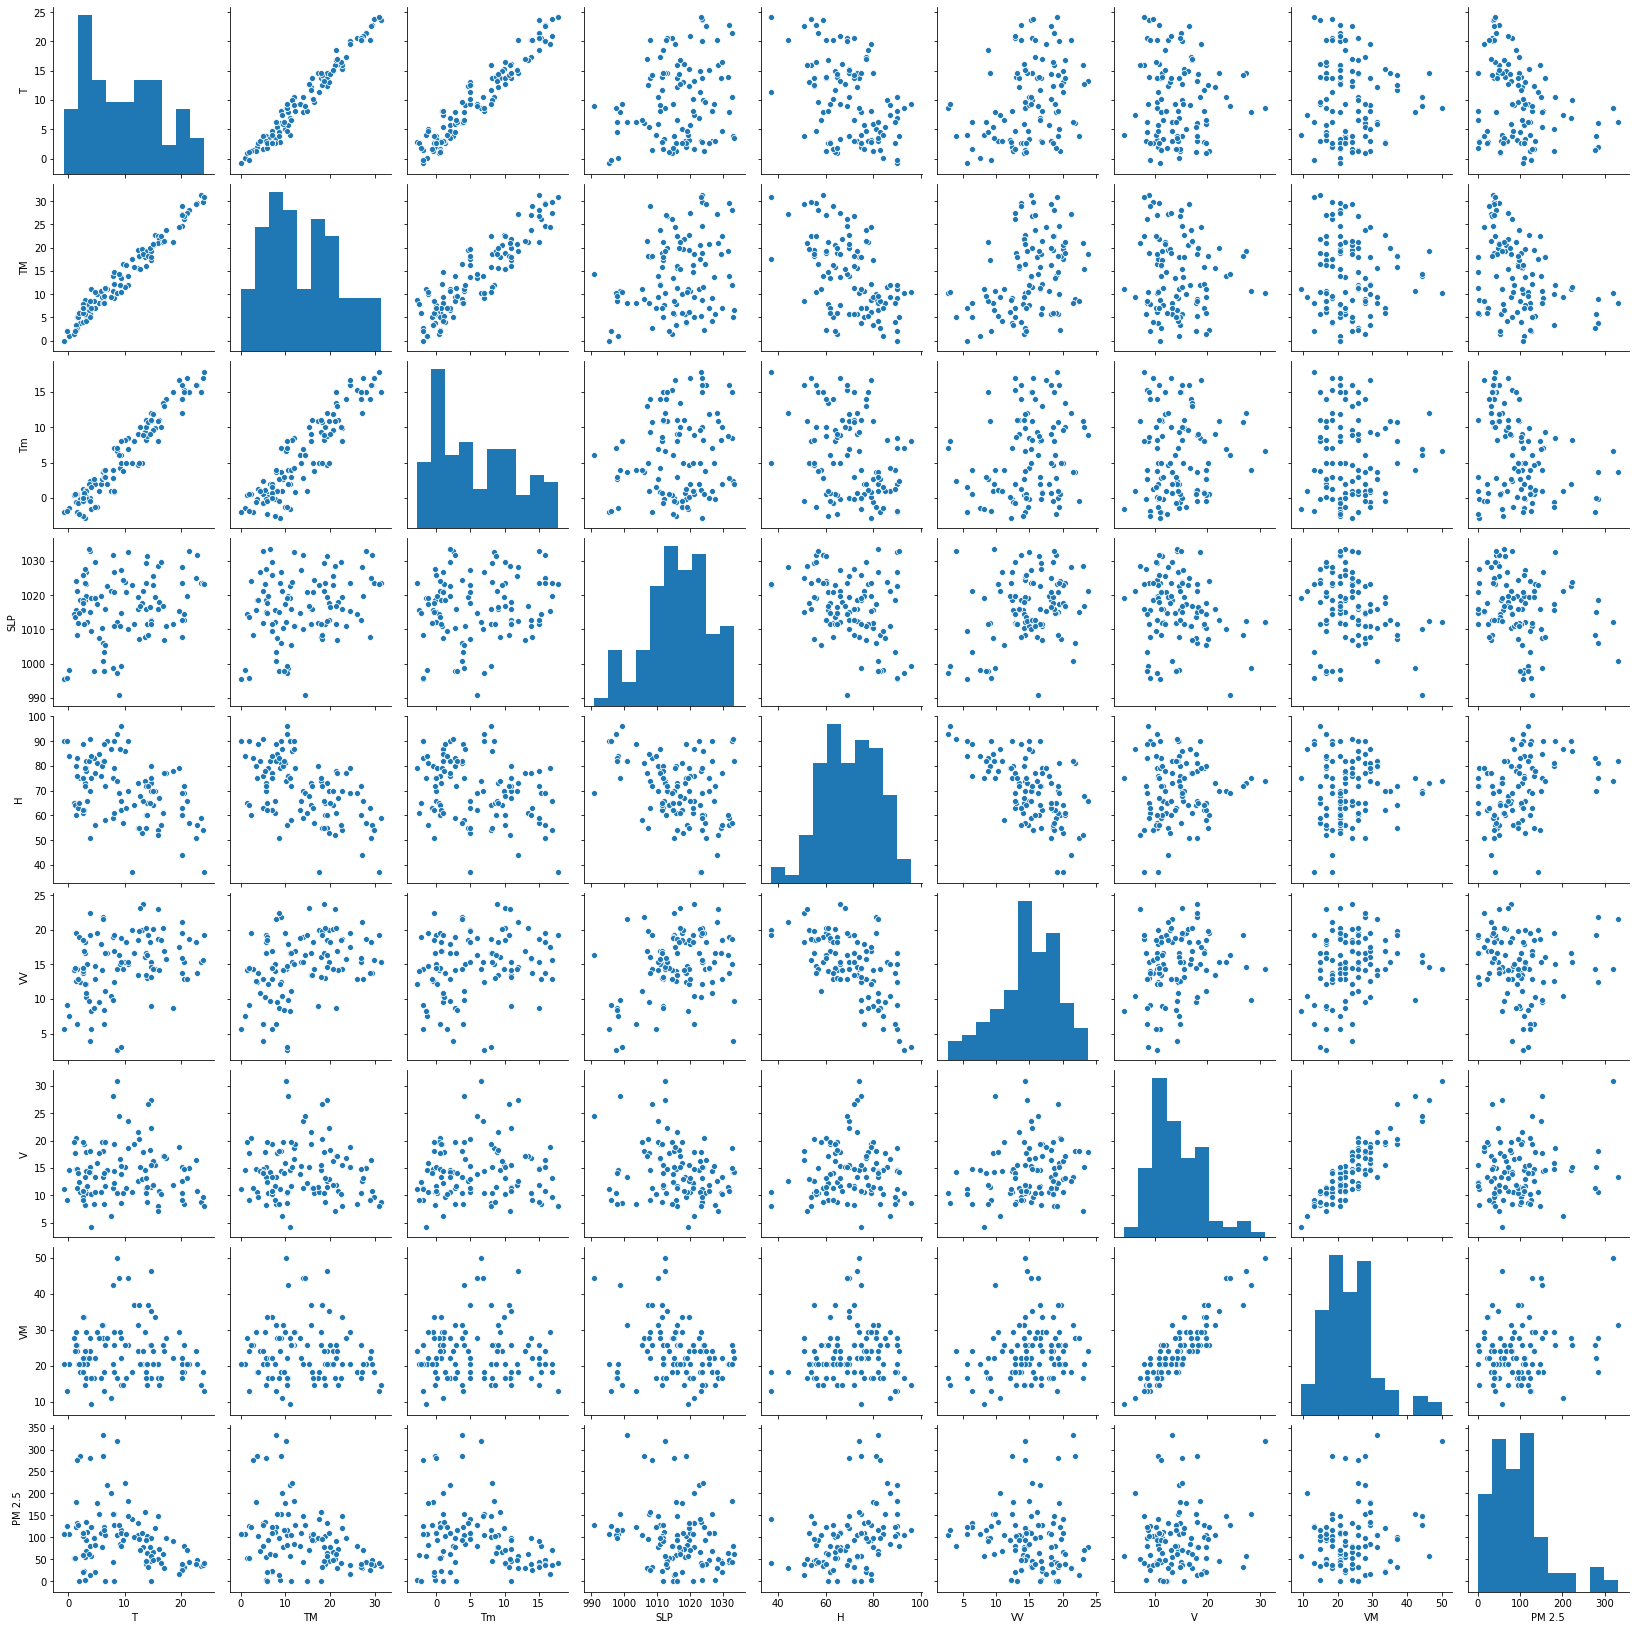

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.982084,0.962178,0.204119,-0.447970,0.314453,-0.028811,-0.051149,-0.315892
TM,0.982084,1.000000,0.910026,0.231964,-0.534904,0.363478,-0.071136,-0.065787,-0.368028
Tm,0.962178,0.910026,1.000000,0.146267,-0.318081,0.221917,0.052358,-0.005032,-0.287935
SLP,0.204119,0.231964,0.146267,1.000000,-0.349226,0.316913,-0.225226,-0.260711,-0.254503
H,-0.447970,-0.534904,-0.318081,-0.349226,1.000000,-0.619798,0.045466,0.049059,0.380279
VV,0.314453,0.363478,0.221917,0.316913,-0.619798,1.000000,0.191387,0.200307,-0.106070
V,-0.028811,-0.071136,0.052358,-0.225226,0.045466,0.191387,1.000000,0.895156,0.136319
VM,-0.051149,-0.065787,-0.005032,-0.260711,0.049059,0.200307,0.895156,1.000000,0.195456
PM 2.5,-0.315892,-0.368028,-0.287935,-0.254503,0.380279,-0.106070,0.136319,0.195456,1.000000


### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

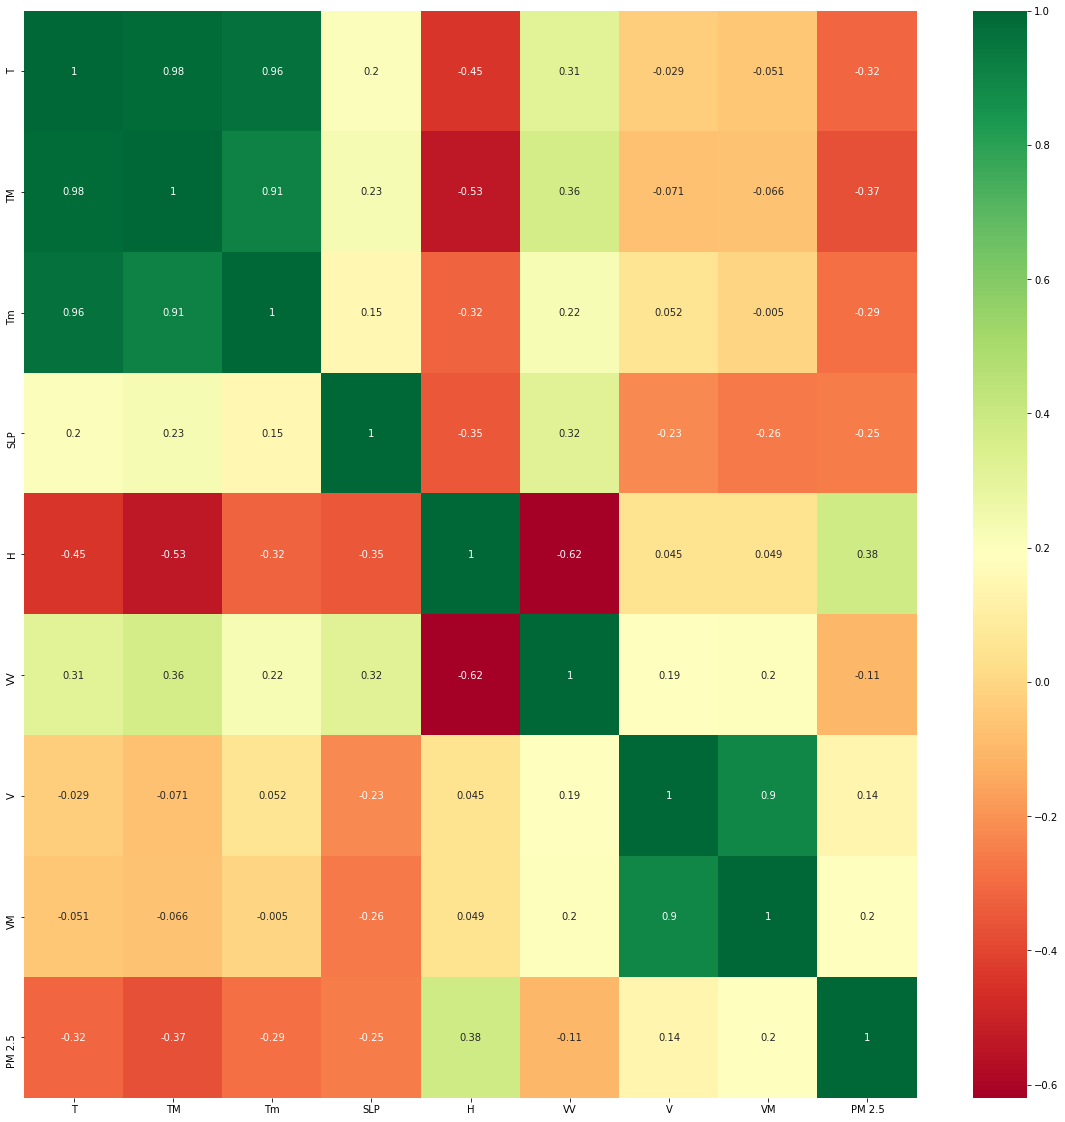

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [14]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,6.1,9.0,3.7,1006.0,81.0,21.9,18.1,27.8
1,6.9,11.0,2.0,1022.8,90.0,16.6,14.6,27.8
2,10.6,12.0,8.5,1032.7,90.0,15.0,18.7,25.9
3,8.1,9.1,7.0,1026.8,90.0,12.4,14.4,18.3
4,10.0,11.5,8.2,1024.0,86.0,15.4,15.2,25.9


In [15]:
print(model.feature_importances_)

[0.1355978  0.11974498 0.14169972 0.0898999  0.17571267 0.13500537
 0.10014334 0.10219622]


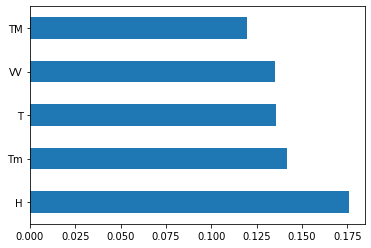

In [16]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Linear Regression

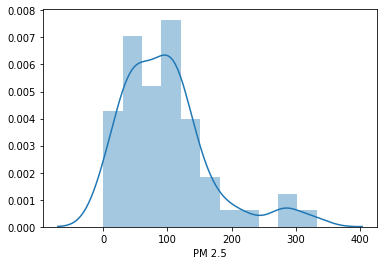

In [17]:
sns.distplot(y)

### Train Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
regressor.coef_

array([ 31.06767929, -18.92929348, -12.23674518,  -1.34675537,
         1.01408075,   1.81177078,  -5.18379979,   4.75243855])

In [22]:
regressor.intercept_

1354.1153215229365

In [23]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.29967668344258025


In [24]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.319313732197533


In [27]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [28]:
score.mean()

-1.6425961976789059

#### Model Evaluation

In [29]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,31.067679
TM,-18.929293
Tm,-12.236745
SLP,-1.346755
H,1.014081
VV,1.811771
V,-5.183800
VM,4.752439


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an *decrease of 2.690 in AQI PM2.5 *.
- Holding all other features fixed, a 1 unit increase in TM is associated with an *increase of 0.46 in AQI PM 2.5 *.


In [30]:
prediction=regressor.predict(X_test)

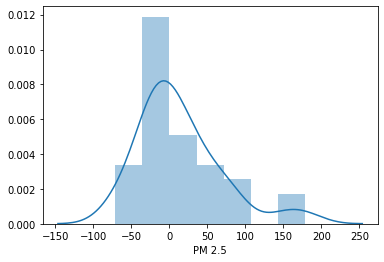

In [31]:
sns.distplot(y_test-prediction)

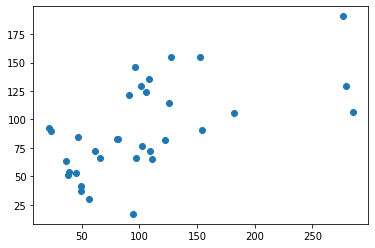

In [32]:
plt.scatter(y_test,prediction)

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [33]:
from sklearn import metrics

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 39.49492024181089
MSE: 3138.935962963231
RMSE: 56.02620782243994


In [35]:
import pickle 

In [36]:
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)